## Introduction to the Sample Final Test

Dear Students,

Welcome to the sample final test for our laboratory course. This test is designed to assess your understanding and application of the concepts and techniques we have covered throughout the semester. 

Instructions:

Read Each Question Carefully: Ensure you understand what is being asked before you start coding.

Write Clean and Commented Code: Your code should be well-organized and include comments explaining your logic.

Test Your Code: Make sure to test your code with different inputs to ensure it works correctly.

Conclusions: Make final decisions, decide about the statistical and practical significance. 

Resources:

You are allowed to use your notes, textbooks, and online resources to help you complete the test. 

**Please be advised that the use of any Generative AI (GenAI) tools is strictly prohibited during this test. This includes, but is not limited to, tools that generate code, text, or any other form of content based on AI algorithms.**

Collaboration with classmates is not permitted. This test is an individual assessment of your skills.

I encourage you to take your time and approach each question methodically. This test is an opportunity to demonstrate your proficiency and understanding of the material. 

Best regards,

Karol
/Mathematical Statistics 2024/2025/



# Task 1: Verify the Hypothesis

Objective: Verify the hypothesis that the salaries of professors working in theoretical departments (B) are much lower than those working in applied departments (A).

In [2]:
import pandas as pd

# Load the Salaries dataset from the URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
salaries = pd.read_csv(url)

# Filter the data based on the department type
theoretical_salaries = salaries[salaries['discipline'] == 'B']['salary']
applied_salaries = salaries[salaries['discipline'] == 'A']['salary']

# Display the first few rows of the dataset
print(salaries.head())

   rownames      rank discipline  yrs.since.phd  yrs.service   sex  salary
0         1      Prof          B             19           18  Male  139750
1         2      Prof          B             20           16  Male  173200
2         3  AsstProf          B              4            3  Male   79750
3         4      Prof          B             45           39  Male  115000
4         5      Prof          B             40           41  Male  141500


In [8]:
# your solution
from scipy.stats import shapiro, mannwhitneyu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 1. Normality Test (Shapiro-Wilk Test)
print("Shapiro-Wilk Test for Normality:")
shapiro_theoretical = shapiro(theoretical_salaries)
shapiro_applied = shapiro(applied_salaries)

print("Theoretical (B): W-statistic =", shapiro_theoretical.statistic, ", P-value =", shapiro_theoretical.pvalue)
print("Applied (A): W-statistic =", shapiro_applied.statistic, ", P-value =", shapiro_applied.pvalue)

# Interpret Shapiro-Wilk test results
if shapiro_theoretical.pvalue < 0.05:
    print("Theoretical salaries are NOT normally distributed.")
else:
    print("Theoretical salaries are normally distributed.")

if shapiro_applied.pvalue < 0.05:
    print("Applied salaries are NOT normally distributed.")
else:
    print("Applied salaries are normally distributed.")

# 2. Choose the Appropriate Test
if shapiro_theoretical.pvalue >= 0.05 and shapiro_applied.pvalue >= 0.05:
    print("\nBoth groups are normally distributed. Proceeding with T-test.")
    # Perform T-test
    t_stat, p_value = ttest_ind(theoretical_salaries, applied_salaries, equal_var=False)  # Welch's T-test
    print("\nT-Test Results:")
    print("T-statistic =", t_stat)
    print("P-value =", p_value)
    
    if p_value < 0.05:
        print("We reject the null hypothesis: There is a significant difference in salaries.")
    else:
        print("We fail to reject the null hypothesis: There is no significant difference in salaries.")
else:
    print("\nAt least one group is NOT normally distributed. Proceeding with Mann-Whitney U Test.")
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(theoretical_salaries, applied_salaries, alternative='two-sided')
    print("\nMann-Whitney U Test Results:")
    print("U-statistic =", u_stat)
    print("P-value =", p_value)
    
    if p_value < 0.05:
        print("We reject the null hypothesis: There is a significant difference in salaries.")
    else:
        print("We fail to reject the null hypothesis: There is no significant difference in salaries.")


Shapiro-Wilk Test for Normality:
Theoretical (B): W-statistic = 0.9611942982211146 , P-value = 1.2710090838425288e-05
Applied (A): W-statistic = 0.9418299292200768 , P-value = 1.0267201943205751e-06
Theoretical salaries are NOT normally distributed.
Applied salaries are NOT normally distributed.

At least one group is NOT normally distributed. Proceeding with Mann-Whitney U Test.

Mann-Whitney U Test Results:
U-statistic = 23386.0
P-value = 0.0007516255132504605
We reject the null hypothesis: There is a significant difference in salaries.


# Task 2: Verify the Hypothesis

Objective: Verify if the proportion of higher rank professors (associate and full professors) is significantly different between male and female scientists.

In [29]:
from scipy.stats import chi2_contingency, fisher_exact

higher_rank = salaries[(salaries['rank'] == 'AssocProf') | (salaries['rank'] == 'Prof')]

# Since its proportion do contingency table
contingency_table = pd.crosstab(higher_rank['sex'], higher_rank['rank'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print("Chi-Square Statistic =", chi2_stat)
print("P-value =", p_value)
print("Degrees of Freedom =", dof)
print("Expected Frequencies:")
print(expected)

# 4. Fisher's Exact Test (for small sample sizes)
if (expected < 5).any():
    print("\nExpected frequencies are too small. Using Fisher's Exact Test.")
    _, fisher_p_value = fisher_exact(contingency_table)
    print("Fisher's Exact Test P-value =", fisher_p_value)
else:
    print("\nChi-Square test is valid. No need for Fisher's Exact Test.")

# Interpretation of Results
if p_value < 0.05:
    print("\nConclusion: We reject the null hypothesis. The proportion of higher rank professors is significantly different between males and females.")
else:
    print("\nConclusion: We fail to reject the null hypothesis. The proportion of higher rank professors is not significantly different between males and females.")


Contingency Table:
rank    AssocProf  Prof
sex                    
Female         10    18
Male           54   248

Chi-Square Test Results:
Chi-Square Statistic = 4.134655979582055
P-value = 0.04201360631381731
Degrees of Freedom = 1
Expected Frequencies:
[[  5.43030303  22.56969697]
 [ 58.56969697 243.43030303]]

Chi-Square test is valid. No need for Fisher's Exact Test.

Conclusion: We reject the null hypothesis. The proportion of higher rank professors is significantly different between males and females.


# Task 3: Verify the Hypothesis

Objective: Verify if the salaries of professors are significantly different based on rank, gender, and discipline, and check for interactions between these groups.

Shapiro-Wilk Test:
W-statistic = 0.9613257574800204, p-value = 1.0112685087472659e-08


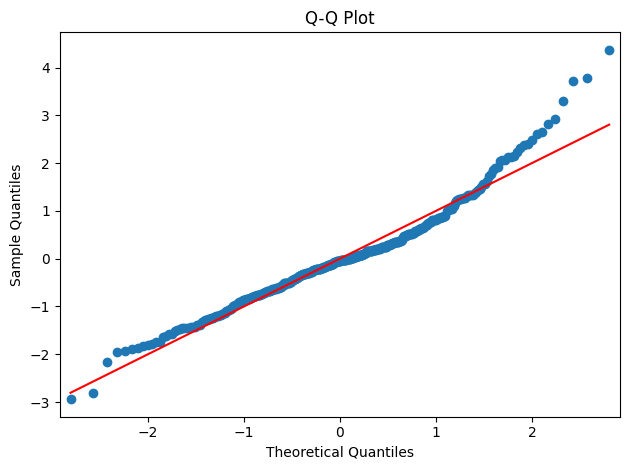


Levene's Test:
Statistic = 38.711118112709656, p-value = 4.47685638232478e-16
                           sum_sq     df           F        PR(>F)
rank                 1.452438e+11    2.0  140.044590  1.980674e-46
sex                  7.587567e+08    1.0    1.463192  2.271652e-01
discipline           1.847478e+10    1.0   35.626894  5.427699e-09
rank:sex             2.184938e+08    2.0    0.210672  8.101327e-01
rank:discipline      4.748308e+08    2.0    0.457833  6.329968e-01
sex:discipline       4.619741e+08    1.0    0.890874  3.458325e-01
rank:sex:discipline  1.323930e+08    2.0    0.127654  8.801953e-01
Residual             1.996466e+11  385.0         NaN           NaN


In [32]:
# your solution
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from scipy.stats import levene

# Convert categorical variables to category data type
salaries['rank'] = salaries['rank'].astype('category')
salaries['sex'] = salaries['sex'].astype('category')
salaries['discipline'] = salaries['discipline'].astype('category')

# Specify the three-way ANOVA model
# We include main effects and interaction terms
model = ols('salary ~ rank * sex * discipline', data=salaries).fit()       # WE MULTIPLY FOR INTERACTIONS

residuals = model.resid
# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"W-statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

sm.qqplot(residuals, line='s', fit=True)
plt.title("Q-Q Plot")
plt.tight_layout()
plt.show()

# Homogenity of variance
levene_test = levene(
    salaries[salaries['rank'] == 'Prof']['salary'],
    salaries[salaries['rank'] == 'AssocProf']['salary'],
    salaries[salaries['rank'] == 'AsstProf']['salary']
)
print("\nLevene's Test:")
print(f"Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")

# It's normal so we perform ANOVA

anova_results = anova_lm(model, typ=2)  # Type II ANOVA table
print(anova_results)
# Look at p-values and check for those lower than 0.05, these impact the salary

# Task 4: Verify the Hypothesis

Objective: Verify if credit amounts (in DM) are significantly different for people applying with different job, personal status, sex, or age.

In [1]:
import pandas as pd

# Load the GermanCredit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)

# Display the first few rows of the dataset
print(germancredit.head())

                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex  \
0      ... >= 7 years                 4                        male : single  

                status  duration                            credit_history  \
0         ... < 100 DM         6   critical account/other credits existing   
1    0 <= ... < 200 DM        48  existing credits paid back duly till now   
2  no checking account        12   critical account/other credits existing   
3         ... < 100 DM        42  existing credits paid back duly till now   
4         ... < 100 DM        24           delay in paying off in the past   

               purpose  amount                     savings  \
0  domestic appliances    1169  unknown/no savings account   
1  domestic appliances    5951                ... < 100 DM   
2           retraining    2096                ... < 100 DM   
3     radio/television    7882                ... < 100 DM   
4            car (new)    4870                ... < 100 DM   

  employment_duration  installment_rate                  personal_status_sex  \
0      ... >= 7 years                 4                        male : single  

C:\Users\rokig\AppData\Local\Temp\ipykernel_13940\3620418443.py:38: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  levene_test = levene(
C:\Users\rokig\AppData\Local\Temp\ipykernel_13940\3620418443.py:69: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  kruskal_test = kruskal(



Levene's Test for Homogeneity of Variance:
Statistic = nan, p-value = nan
Variance is homogeneous.

ANOVA Results (Amount ~ Job):
                sum_sq     df          F        PR(>F)
C(job)    8.912010e+08    3.0  41.857738  1.771472e-25
Residual  7.068675e+09  996.0        NaN           NaN

ANOVA Results (Amount ~ Age Group):
                    sum_sq     df         F   PR(>F)
C(age_group)  6.791897e+06    2.0  0.425717  0.65342
Residual      7.953084e+09  997.0       NaN      NaN

Kruskal-Wallis Test Results (Amount ~ Job):
Statistic = nan, p-value = nan

Tukey Post-Hoc Test:
                                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                                             
                          group1                                          group2                meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------------------------------------

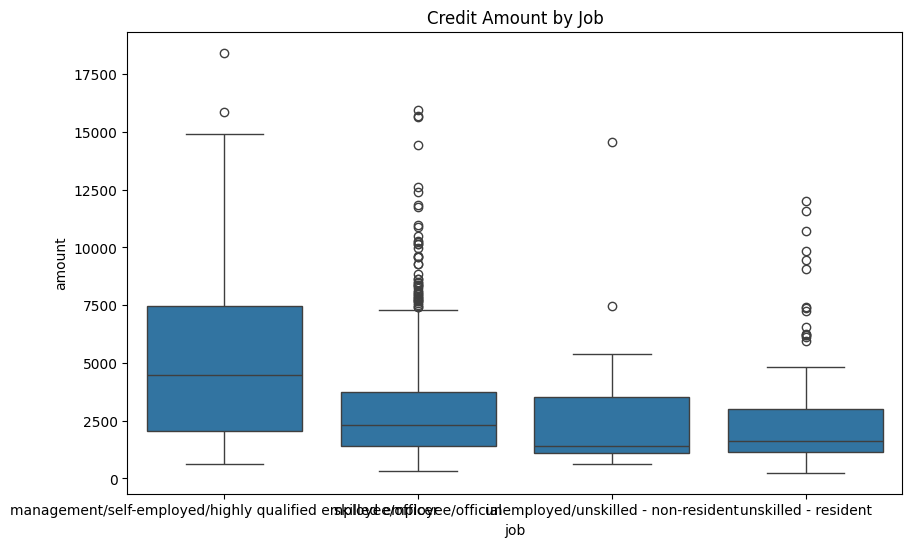

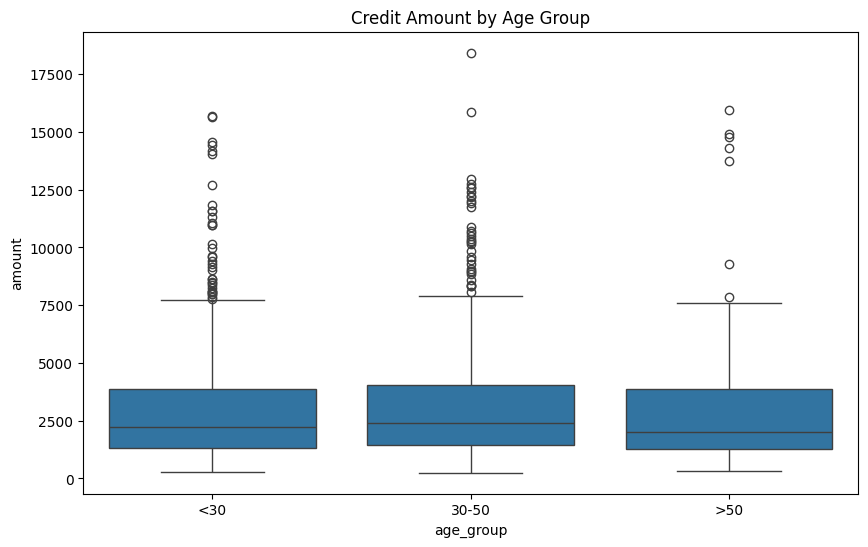

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, kruskal
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


df = germancredit
# Check the data
print(df.head())

# ------------------------
# Step 1: Data Preparation
# ------------------------
# Convert categorical variables to category dtype
df['job'] = df['job'].astype('category')
df['personal_status_sex'] = df['personal_status_sex'].astype('category')

# Optional: Bin age into groups (e.g., <30, 30-50, >50)
df['age_group'] = pd.cut(df['age'].astype(int), bins=[0, 30, 50, 100], labels=['<30', '30-50', '>50'])

# -------------------------
# Step 2: Check Assumptions
# -------------------------
# (a) Normality Test (Shapiro-Wilk) on credit amount
shapiro_test = shapiro(df['amount'])
print("Shapiro-Wilk Test for Normality:")
print(f"W-statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")
if shapiro_test.pvalue < 0.05:
    print("Credit amounts are NOT normally distributed.")
else:
    print("Credit amounts are normally distributed.")

# (b) Homogeneity of Variance (Levene's Test)
levene_test = levene(
    df[df['job'] == 'job1']['amount'],
    df[df['job'] == 'job2']['amount'],
    df[df['job'] == 'job3']['amount']
)
print("\nLevene's Test for Homogeneity of Variance:")
print(f"Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")
if levene_test.pvalue < 0.05:
    print("Variance is NOT homogeneous.")
else:
    print("Variance is homogeneous.")

# ------------------------
# Step 3: Perform ANOVA
# ------------------------
# Example ANOVA: Credit amount by job type
model = ols('amount ~ C(job)', data=df).fit()
anova_results = anova_lm(model, typ=2)
print("\nANOVA Results (Amount ~ Job):")
print(anova_results)

# Example ANOVA: Credit amount by age group
model_age = ols('amount ~ C(age_group)', data=df).fit()
anova_age_results = anova_lm(model_age, typ=2)
print("\nANOVA Results (Amount ~ Age Group):")
print(anova_age_results)

# ---------------------------
# Step 4: Non-Parametric Test
# ---------------------------
# If assumptions are violated, use Kruskal-Wallis
kruskal_test = kruskal(
    df[df['job'] == 'job1']['amount'],
    df[df['job'] == 'job2']['amount'],
    df[df['job'] == 'job3']['amount']
)
print("\nKruskal-Wallis Test Results (Amount ~ Job):")
print(f"Statistic = {kruskal_test.statistic}, p-value = {kruskal_test.pvalue}")

# -----------------------
# Step 5: Post-Hoc Tests
# -----------------------
# Tukey's Test for pairwise comparisons (if ANOVA is significant)
tukey = pairwise_tukeyhsd(df['amount'], df['job'])
print("\nTukey Post-Hoc Test:")
print(tukey)

# --------------------
# Step 6: Visualization
# --------------------
# Boxplot for visual comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='amount', data=df)
plt.title("Credit Amount by Job")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='amount', data=df)
plt.title("Credit Amount by Age Group")
plt.show()


# Task 5: Evaluate Interaction Between Group and Time

Description: 

The data provide the anxiety score, measured at three time points, of three groups of individuals practicing physical exercises at different levels (grp1: basal, grp2: moderate and grp3: high)

Objective: Evaluate if there is an interaction between group and time in explaining anxiety scores.

In [13]:
import pandas as pd

# Load the anxiety dataset from GitHub
url = "https://raw.githubusercontent.com/kflisikowski/ds/master/anxiety.csv"
anxiety_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(anxiety_data.head())

   Unnamed: 0  id group    t1    t2    t3
0           1   1  grp1  14.1  14.4  14.1
1           2   2  grp1  14.5  14.6  14.3
2           3   3  grp1  15.7  15.2  14.9
3           4   4  grp1  16.0  15.5  15.3
4           5   5  grp1  16.5  15.8  15.7


In [ ]:
# your solution

# Task 6: Evaluate the Goodness of Fit

Objective: Use the goodness of fit test to determine whether the distribution of credit amounts for male customers matches that of female customers.

In [6]:
import pandas as pd
from scipy.stats import ks_2samp

# Load the German Credit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)
df = germancredit
# Extract gender by splitting the string
df['gender'] = df['personal_status_sex'].str.split(':').str[0].str.strip()


male_credit = df[df['gender'] == 'male']
female_credit = df[df['gender'] == 'female']


# Perform the KS test
ks_stat, ks_p_value = ks_2samp(male_credit['amount'], female_credit['amount'])

print("\nKolmogorov-Smirnov Test:")
print(f"KS Statistic = {ks_stat}")
print(f"P-value = {ks_p_value}")

if ks_p_value < 0.05:
    print("The distributions of credit amounts for males and females are significantly different.")
else:
    print("The distributions of credit amounts for males and females are not significantly different.")



Kolmogorov-Smirnov Test:
KS Statistic = 0.1305750350631136
P-value = 0.0012052294301572195
The distributions of credit amounts for males and females are significantly different.


In [ ]:
# your solution

# Task 7: Evaluate the Change in Asthma Symptoms Over Time

Objective: determine if there is a significant change in asthma symptoms reported by participants at two different time points.

In [2]:
import pandas as pd

# Load the asthma dataset from GitHub
url = "https://github.com/bougioukas/basic_stats_R/raw/main/data/asthma.xlsx"
asthma_data = pd.read_excel(url)

# Display the first few rows of the dataset
print(asthma_data.head())

  know_begin know_end
0        yes      yes
1         no       no
2        yes       no
3         no       no
4         no       no


In [ ]:
# your solution

# Task 8: Differences of BG readings Over Time 

Objective: determine if there is a significant difference in the blood glucose (BG) readings over multiple time points.

Data: let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes.

The test is done three times, say before, within and after a given clinical treatment and we want to know if there is a significant difference within the groups (times).

In [4]:
# Read dataset from url:
import io
import requests
url="https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)


df.columns=['before','during','after']
df.index.name='Subject'
df.head(10)

,before,during,after
Subject,,,
0,89.162573,94.023517,94.594145
1,90.857629,95.273755,95.040646
2,94.912999,96.612870,95.200472
3,95.254064,96.818673,97.205801
4,97.136291,97.760342,98.428840
5,99.809999,99.169227,98.867769
6,101.094087,99.579283,99.790581
7,101.531428,99.661758,100.669928
8,101.981148,100.812359,101.751155


In [ ]:
# your solution

# Task 9: Evaluate the Change in Mice Weights Before and After Treatment

Objective: determine if there is a significant difference in the weights of mice before and after treatment.

In [6]:
import pandas as pd

# Weight of the mice before treatment
before = [200.1, 190.9, 192.7, 213, 241.4, 196.9, 172.2, 185.5, 205.2, 193.7]

# Weight of the mice after treatment
after = [392.9, 393.2, 345.1, 393, 434, 427.9, 422, 383.9, 392.3, 352.2]

# Create a data frame
my_data = pd.DataFrame({
    'group': ['before'] * len(before) + ['after'] * len(after),
    'weight': before + after
})

# Display the first few rows of the dataset
print(my_data.head(10))

    group  weight
0  before   200.1
1  before   190.9
2  before   192.7
3  before   213.0
4  before   241.4
5  before   196.9
6  before   172.2
7  before   185.5
8  before   205.2
9  before   193.7


In [ ]:
# your solution

# Task 10: Calculate Effect Size and Power 

Objective: Use Python to calculate the effect size and power for a test comparing the total bill amounts between smokers and non-smokers. Interpret your results. If the power is not satisfactory - how many observations should we sample to achieve 90% power?

The tips dataset contains information about tips received by waitstaff in a restaurant, including various attributes such as total bill, tip amount, sex of the bill payer, whether the payer is a smoker, day of the week, time of day, and size of the party.

The tips dataset contains the following columns:

total_bill: The total bill amount (including tip) in dollars.

tip: The tip amount in dollars.

sex: The sex of the bill payer (Male or Female).

smoker: Whether the bill payer is a smoker (Yes or No).

day: The day of the week (Thur, Fri, Sat, Sun).

time: The time of day (Lunch or Dinner).

size: The size of the party.

In [7]:
import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower


# ---------------------
# Step 1: Calculate Effect Size (Cohen's d)
# ---------------------
# Separate total_bill amounts for smokers and non-smokers
smokers = tips[tips['smoker'] == 'Yes']['total_bill']
non_smokers = tips[tips['smoker'] == 'No']['total_bill']

# Compute means and standard deviations
mean_smokers = smokers.mean()
mean_non_smokers = non_smokers.mean()
std_smokers = smokers.std()
std_non_smokers = non_smokers.std()

# Pooled standard deviation
n_smokers = len(smokers)
n_non_smokers = len(non_smokers)
pooled_std = np.sqrt(((n_smokers - 1) * std_smokers**2 + (n_non_smokers - 1) * std_non_smokers**2) /
                     (n_smokers + n_non_smokers - 2))

# Cohen's d
effect_size = (mean_smokers - mean_non_smokers) / pooled_std
print(f"Effect Size (Cohen's d): {effect_size:.4f}")

# ---------------------
# Step 2: Calculate Statistical Power
# ---------------------
# Define the test parameters
alpha = 0.05  # Significance level
analysis = TTestIndPower()
power = analysis.power(effect_size=effect_size, nobs1=n_smokers, alpha=alpha, ratio=n_non_smokers / n_smokers)

print(f"Power of the test: {power:.4f}")

# ---------------------
# Step 3: Determine Required Sample Size for 90% Power
# ---------------------
# Calculate the required sample size for 90% power
required_n = analysis.solve_power(effect_size=effect_size, power=0.90, alpha=alpha, ratio=n_non_smokers / n_smokers)
print(f"Required sample size per group for 90% power: {np.ceil(required_n):.0f}")


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Effect Size (Cohen's d): 0.1764
Power of the test: 0.2659
Required sample size per group for 90% power: 547


In [ ]:
# your solution